In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Starting base MFCC extraction for 8 files in /content/drive/My Drive/a2/KAGGLE/AUDIO/REAL...
Base MFCC features for biden-original.wav already exist. Skipping.
Base MFCC features for margot-original.wav already exist. Skipping.
Base MFCC features for linus-original.wav already exist. Skipping.
Base MFCC features for musk-original.wav already exist. Skipping.
Base MFCC features for ryan-original.wav already exist. Skipping.
Base MFCC features for obama-original.wav already exist. Skipping.
Base MFCC features for taylor-original.wav already exist. Skipping.
Base MFCC features for trump-original.wav already exist. Skipping.
Starting base MFCC extraction for 56 files in /content/drive/My Drive/a2/KAGGLE/AUDIO/FAKE...
Base MFCC features for Obama-to-Biden.wav already exist. Skipping.
Base MFCC features for Obama-to-Trump.wav already exist. Skipping.
Base MFCC features for biden-to-Obama.wav already exist. Skipping.
Base MFCC features for biden-to-Trump.wav already exist. Skipping.
Base MFCC

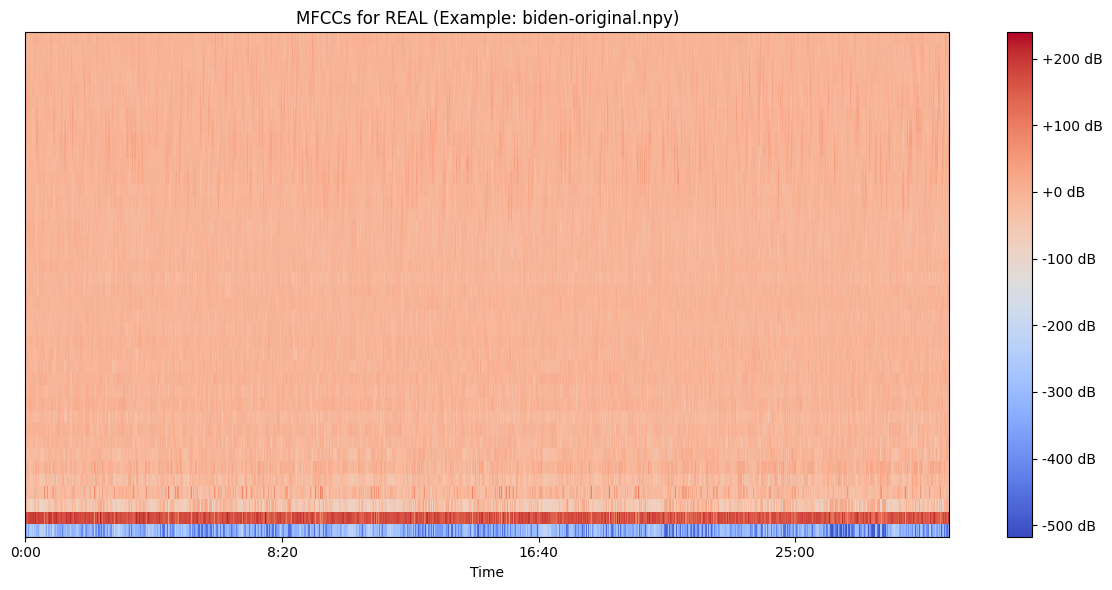

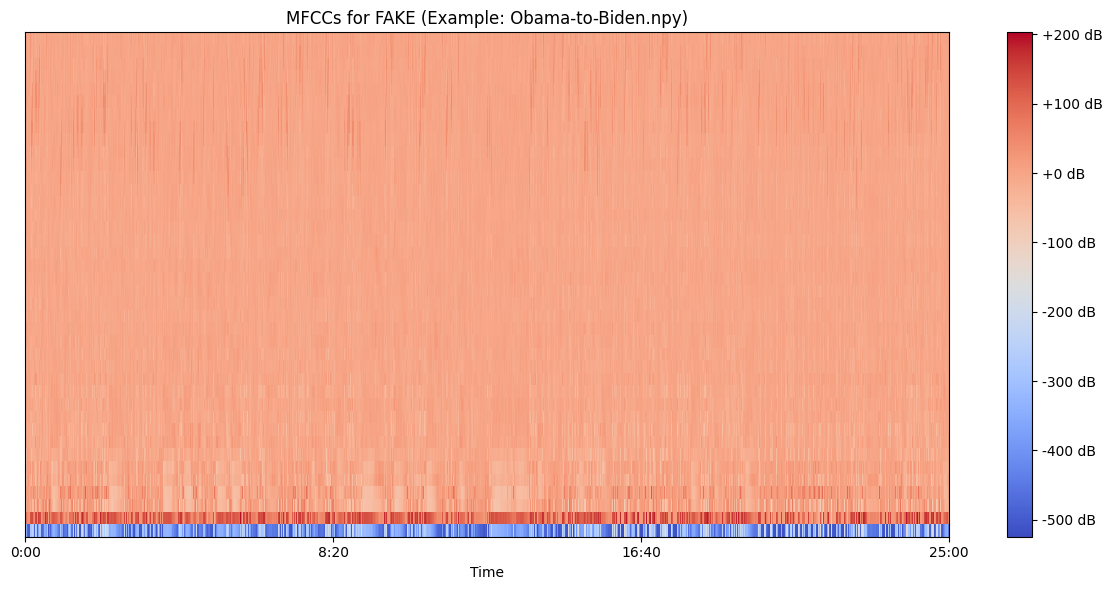

Loading enhanced features from /content/drive/My Drive/a2/KAGGLE/FEATURES/REAL_MFCC_Enhanced (Label: 1)...
Loading enhanced features from /content/drive/My Drive/a2/KAGGLE/FEATURES/FAKE_MFCC_Enhanced (Label: 0)...

Loaded 64 feature vectors from all classes.
Shape of feature array (X): (64, 240)
Shape of label array (y): (64,)
Distribution of labels in y (0: FAKE, 1: REAL): [56  8]
Features scaled.

Data split: 51 training samples, 13 testing samples.
Training set class distribution (0: FAKE, 1: REAL): [45  6]
Testing set class distribution (0: FAKE, 1: REAL): [11  2]

Random Forest model trained (Binary Classification).

Model Accuracy on Test Set: 0.8462

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.85      1.00      0.92        11
        REAL       0.00      0.00      0.00         2

    accuracy                           0.85        13
   macro avg       0.42      0.50      0.46        13
weighted avg       0.72      0.85      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



The audio file '/content/drive/My Drive/a2/KAGGLE/AUDIO/FAKE/musk-to-linus.wav' is predicted as: FAKE


In [4]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Add confusion_matrix
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import matplotlib.pyplot as plt
import librosa.display




# --- Configuration ---
# Define directories for your two classes: REAL and FAKE (Mimicry)
AUDIO_DIRS = {
    "REAL": "/content/drive/My Drive/a2/KAGGLE/AUDIO/REAL",
    "FAKE": "/content/drive/My Drive/a2/KAGGLE/AUDIO/FAKE", # Your Mimicry data
}

# Define directories for where to save the base MFCC features for these two classes
FEATURE_DIRS = {
    "REAL": "/content/drive/My Drive/a2/KAGGLE/FEATURES/REAL_MFCC_Enhanced",
    "FAKE": "/content/drive/My Drive/a2/KAGGLE/FEATURES/FAKE_MFCC_Enhanced",
}

# Map class names to numerical labels for binary classification
# Ensure these match your desired output mapping
CLASS_LABELS = {
    "REAL": 1,  # Assign 1 to Real (often treated as the positive class)
    "FAKE": 0,  # Assign 0 to Fake/Mimicry (often treated as the negative class)
}
# Create a reverse mapping for interpreting predictions
LABEL_TO_CLASS = {v: k for k, v in CLASS_LABELS.items()}


# MFCC parameters (should be consistent throughout)
n_mfcc = 40
hop_length = 512
n_fft = 2048


# --- 1. Extract Base MFCC Features for both classes ---

def extract_and_save_mfcc_features(audio_dir, output_features_dir, n_mfcc, hop_length, n_fft):
    """
    Extracts MFCC features from audio files in a directory and saves them as .npy files.
    """
    os.makedirs(output_features_dir, exist_ok=True)
    all_audio_filenames = [f for f in os.listdir(audio_dir) if f.endswith(".wav")]

    print(f"Starting base MFCC extraction for {len(all_audio_filenames)} files in {audio_dir}...")

    for filename in all_audio_filenames:
        audio_file_path = os.path.join(audio_dir, filename)
        feature_output_path = os.path.join(output_features_dir, f"{os.path.splitext(filename)[0]}.npy")

        if os.path.exists(feature_output_path):
            print(f"Base MFCC features for {filename} already exist. Skipping.")
            continue

        try:
            y, sr = librosa.load(audio_file_path, sr=None)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
            np.save(feature_output_path, mfccs)
            print(f"Base MFCCs saved to {feature_output_path}")

        except Exception as e:
            print(f"Error extracting base MFCCs from {audio_file_path}: {e}")

# Call the function for each audio directory defined in AUDIO_DIRS
for class_name, audio_dir_path in AUDIO_DIRS.items():
    output_features_dir_path = FEATURE_DIRS[class_name]
    extract_and_save_mfcc_features(audio_dir_path, output_features_dir_path, n_mfcc, hop_length, n_fft)

print("\nCompleted base MFCC extraction for all specified audio directories.")


# --- 2. Visualize Extracted Features (Example for one file from each class) ---
print("\n--- Visualizing Example Features ---")
for class_name, feature_dir_path in FEATURE_DIRS.items():
    files_in_dir = [f for f in os.listdir(feature_dir_path) if f.endswith(".npy")]
    if files_in_dir:
        example_feature_file = os.path.join(feature_dir_path, files_in_dir[0])
        try:
            features_to_visualize = np.load(example_feature_file)

            plt.figure(figsize=(12, 6))
            # For MFCCs, specshow expects (n_features, n_time)
            # Assuming a common sampling rate like 16000 Hz for display purposes
            librosa.display.specshow(features_to_visualize, x_axis='time', sr=16000)
            plt.colorbar(format="%+2.f dB")
            plt.title(f'MFCCs for {class_name} (Example: {files_in_dir[0]})')
            plt.tight_layout()
            plt.show()
        except Exception as e:
             print(f"Could not visualize features for {example_feature_file}: {e}")
    else:
        print(f"No feature files found for {class_name} visualization.")


# --- 3. Load Enhanced Features and Create Labels for both classes ---

def load_features_and_create_labels_enhanced(features_dir, label):
    """
    Loads base MFCC features from .npy files, computes Delta and Delta-Delta,
    and aggregates features by taking mean and variance across time.

    Args:
        features_dir (str): Directory containing the base MFCC .npy files.
        label (int): The numerical label (0 or 1) to assign to these features.

    Returns:
        tuple: A tuple containing:
            - features_list (list): List of aggregated feature vectors.
            - labels_list (list): List of corresponding labels.
            - filenames_list (list): List of original filenames.
    """
    features_list = []
    labels_list = []
    filenames_list = []

    print(f"Loading enhanced features from {features_dir} (Label: {label})...")

    for filename in os.listdir(features_dir):
        if filename.endswith(".npy"):
            feature_path = os.path.join(features_dir, filename)
            try:
                mfccs = np.load(feature_path)

                if mfccs.ndim != 2:
                     print(f"Warning: Skipping {filename} due to unexpected base MFCC shape: {mfccs.shape}")
                     continue

                # Check if there are enough time steps for delta computation
                if mfccs.shape[1] < 3: # Need at least 3 time steps for 2nd order delta
                     print(f"Warning: Not enough time steps ({mfccs.shape[1]}) for delta computation for {filename}. Skipping.")
                     continue

                mfccs_delta = librosa.feature.delta(mfccs)
                mfccs_delta2 = librosa.feature.delta(mfccs, order=2)

                # Delta/Delta-Delta can sometimes have slightly different time dimensions
                # due to boundary effects depending on the implementation details/versions.
                # A robust approach might pad or truncate, but a simple check is below.
                if mfccs_delta.shape[-1] != mfccs.shape[-1] or mfccs_delta2.shape[-1] != mfccs.shape[-1]:
                     print(f"Warning: Delta/Delta-Delta time dimensions mismatch for {filename}. Skipping.")
                     continue


                # Combine base MFCCs, Delta, and Delta-Delta along the feature axis (axis=0)
                # The shape of combined_mfccs will be (n_mfcc * 3, time_steps)
                combined_mfccs = np.concatenate((mfccs, mfccs_delta, mfccs_delta2), axis=0)

                # Aggregate features (mean and variance) across time (axis=1 of the combined features)
                # The shape of combined_mfccs is (total_features, time_steps)
                combined_mfccs_mean = np.mean(combined_mfccs, axis=1)
                combined_mfccs_var = np.var(combined_mfccs, axis=1)

                # Concatenate mean and variance to create a single feature vector per audio clip
                # The shape of aggregated_features will be (total_features * 2,)
                aggregated_features = np.concatenate((combined_mfccs_mean, combined_mfccs_var))

                features_list.append(aggregated_features)
                labels_list.append(label)
                # Reconstruct the original filename (assuming .wav) from the .npy filename
                original_filename = os.path.splitext(filename)[0] + ".wav"
                filenames_list.append(original_filename)

            except Exception as e:
                print(f"Error loading or processing features from {feature_path}: {e}")
                # Optionally, append None or a placeholder to maintain list length if needed later

    return features_list, labels_list, filenames_list

# --- Load All Features and Labels ---

# Load features and labels for both classes
all_features = []
all_labels = []
all_filenames = []

for class_name, feature_dir_path in FEATURE_DIRS.items():
    # Use the label from the CLASS_LABELS dictionary
    label = CLASS_LABELS[class_name]
    class_features, class_labels, class_filenames = load_features_and_create_labels_enhanced(feature_dir_path, label)
    all_features.extend(class_features)
    all_labels.extend(class_labels)
    all_filenames.extend(class_filenames)


print(f"\nLoaded {len(all_features)} feature vectors from all classes.")

# Convert to NumPy arrays
X = np.array(all_features)
y = np.array(all_labels)

print(f"Shape of feature array (X): {X.shape}")
print(f"Shape of label array (y): {y.shape}")
# Show the distribution of the two binary labels
print(f"Distribution of labels in y (0: FAKE, 1: REAL): {np.bincount(y)}")


# Check for empty arrays
if X.size == 0:
    print("Error: No features were successfully loaded. Cannot proceed with training.")
else:
    # --- 4. Preprocess Features (Scaling) ---
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print("Features scaled.")

    # --- 5. Split Data ---
    # Using stratify=y to maintain class distribution in train and test sets
    # Ensure there are at least two samples and two unique classes
    if len(X_scaled) < 2 or len(np.unique(y)) < 2:
         print("Error: Not enough samples or classes (need at least 2) to perform train/test split.")
         # Handle this case, e.g., exit or skip training
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

        print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples.")
        print("Training set class distribution (0: FAKE, 1: REAL):", np.bincount(y_train))
        print("Testing set class distribution (0: FAKE, 1: REAL):", np.bincount(y_test))


        # --- 6. Train a Classifier (RandomForest - suitable for binary) ---
        model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1)
        model.fit(X_train, y_train)

        print("\nRandom Forest model trained (Binary Classification).")

        # --- 7. Evaluate the Model ---
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")

        # Print classification report (binary)
        print("\nClassification Report:")
        # Provide target_names for better readability (matching the labels 0 and 1)
        target_names = [LABEL_TO_CLASS[i] for i in sorted(LABEL_TO_CLASS.keys())]
        print(classification_report(y_test, y_pred, target_names=target_names))

        # Visualize Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")
        print(cm)




        # --- 8. Code to predict on a single new audio file (after training) ---

        def predict_single_audio_binary(audio_file_path, model, scaler, n_mfcc, hop_length, n_fft, label_to_class_map):
            """
            Loads a single audio file, extracts and preprocesses enhanced features,
            makes a prediction, and interprets the prediction using the class map.
            This version is tailored for binary (FAKE/REAL) output.
            """
            try:
                y, sr = librosa.load(audio_file_path, sr=None)
                mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)

                if mfccs.ndim != 2:
                     print(f"Error: Unexpected MFCC shape for {audio_file_path} during delta computation: {mfccs.shape}")
                     return "Error: Feature extraction failed"

                if mfccs.shape[1] < 3: # Need at least 3 time steps for 2nd order delta
                     print(f"Error: Not enough time steps ({mfccs.shape[1]}) for delta computation for {audio_file_path}. Skipping prediction.")
                     return "Error: Not enough data for features"

                mfccs_delta = librosa.feature.delta(mfccs)
                mfccs_delta2 = librosa.feature.delta(mfccs, order=2)

                if mfccs_delta.shape[-1] != mfccs.shape[-1] or mfccs_delta2.shape[-1] != mfccs.shape[-1]:
                     print(f"Error: Delta/Delta-Delta time dimensions mismatch for {audio_file_path}. Skipping prediction.")
                     return "Error: Feature dimension mismatch"

                combined_mfccs = np.concatenate((mfccs, mfccs_delta, mfccs_delta2), axis=0)

                combined_mfccs_mean = np.mean(combined_mfccs, axis=1)
                combined_mfccs_var = np.var(combined_mfccs, axis=1)
                aggregated_features = np.concatenate((combined_mfccs_mean, combined_mfccs_var))

                aggregated_features = aggregated_features.reshape(1, -1)

                scaled_features = scaler.transform(aggregated_features)

                # Make the prediction (returns an array with one element)
                prediction_label = model.predict(scaled_features)[0]

                # Interpret the prediction using the map
                prediction_class = label_to_class_map.get(prediction_label, "Unknown Class")

                return prediction_class

            except Exception as e:
                print(f"Error processing and predicting for {audio_file_path}: {e}")
                return f"Error: {str(e)}"


        # --- Example Usage for a single prediction ---

        # Specify the path to a new audio file you want to classify
        # MAKE SURE this file exists and is one of the test files (or a completely new file)
        test_audio_file_path_example = "/content/drive/My Drive/a2/KAGGLE/AUDIO/FAKE/musk-to-linus.wav" # REPLACE with a valid path to a file you want to test

        # Make the prediction
        if 'model' in locals() and 'scaler' in locals() and 'LABEL_TO_CLASS' in locals():
            prediction_result = predict_single_audio_binary( # Use the binary version
                test_audio_file_path_example,
                model,
                scaler,
                n_mfcc,
                hop_length,
                n_fft,
                LABEL_TO_CLASS # Pass the mapping
            )
            print(f"\nThe audio file '{test_audio_file_path_example}' is predicted as: {prediction_result}")
        else:
            print("\nModel, scaler, or label mapping not available. Please run the training code first.")